# WordCloud 制作词云

In [1]:
import jieba
import pandas as pd
import numpy as np
from imageio import imread
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities
import gensim

In [3]:
#定义停用词
stopwords=pd.read_csv("./stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')
#stopwords=stopwords['stopword'].values
#加载语料
df = pd.read_csv('./mid-autumn.csv', encoding='utf-8')
print(df.head(5))
#删除nan行
df.dropna(inplace=True)
lines = df.content.values.tolist()
print(lines[0].split('::')[1])
#用jieba进行分词操作
segment=[]
#分词
for line in lines:
    try:
        line = line.split('::')[1]
        segs = jieba.lcut(line)
        segs = [v for v in segs if not str(v).isdigit()] #过滤数字
        segs = list(filter(lambda x:x.strip(), segs)) #过滤空格
        #segs = list(filter(lambda x:x not in stopwords, segs)) #去掉停用词
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except Exception:
        print(line)
        continue
    

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/71/4jh7f4f54db5qnl_3bmv59bh0000gn/T/jieba.cache


                                             content
0  水调歌头·明月几时有(苏轼)::丙辰中秋，欢饮达旦，大醉，作此篇，兼怀子由。明月几时有？把酒...
1          中秋月(晏殊)::十轮霜影转庭梧，此夕羁人独向隅。未必素娥无怅恨，玉蟾清冷桂花孤。
2  西江月·世事一场大梦(苏轼)::世事一场大梦，人生几度秋凉？夜来风叶已鸣廊。看取眉头鬓上。(...
3  天竺寺八月十五日夜桂(皮日休)::玉颗珊珊下月轮，殿前拾得露华新。 至今不会天中事，应是嫦娥...
4  阳关曲·中秋月(苏轼)::中秋作本名小秦王，入腔即阳关曲暮云收尽溢清寒，银汉无声转玉盘。此生...
丙辰中秋，欢饮达旦，大醉，作此篇，兼怀子由。明月几时有？把酒问青天。不知天上宫阙，今夕是何年。我欲乘风归去，又恐琼楼玉宇，高处不胜寒。起舞弄清影，何似在人间？(何似 一作：何时；又恐 一作：惟 / 唯恐)转朱阁，低绮户，照无眠。不应有恨，何事长向别时圆？人有悲欢离合，月有阴晴圆缺，此事古难全。但愿人长久，千里共婵娟。(长向 一作：偏向)


Loading model cost 0.711 seconds.
Prefix dict has been built succesfully.


In [4]:
#分词后加入一个新的DataFrame
words_df=pd.DataFrame({'segment':segment})
#安装关键字groupby分组统计词频，并按照计数降序排序
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":np.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
#分组之后去掉停用词
words_stat=words_stat[~words_stat.segment.isin(stopwords.stopword)]
#print(words_stat)

/Users/xishuang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


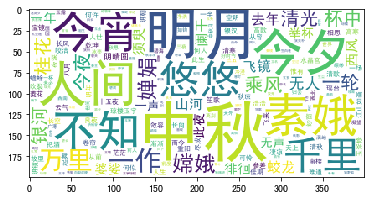

In [6]:
#下面是重点，绘制wordcloud词云，这一提供2种方式
#第一种是默认的样式
#定义wordcloud中字体文件的路径
simhei = "./car.ttf"
wordcloud=WordCloud(font_path=simhei,background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
wordcloud.to_file(r'wordcloud_1.jpg')  #保存结果

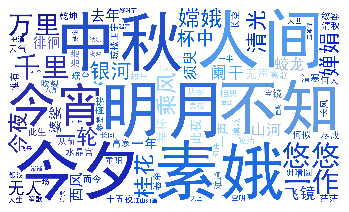

In [7]:
#第二种是自定义图片
text = " ".join(words_stat['segment'].head(100).astype(str))
abel_mask = imread(r"./china.jpg")  #这里设置了一张中国地图
wordcloud2 = WordCloud(background_color='white',  # 设置背景颜色 
                     mask = abel_mask,  # 设置背景图片
                     max_words = 3000,  # 设置最大现实的字数
                     font_path = simhei,  # 设置字体格式
                     width=2048,
                     height=1024,
                     scale=4.0,
                     max_font_size= 100,  # 字体最大值
                     random_state=42).generate(text)

# 根据图片生成词云颜色
image_colors = ImageColorGenerator(abel_mask)
wordcloud2.recolor(color_func=image_colors)
# 以下代码显示图片
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()
wordcloud2.to_file(r'wordcloud_2.jpg') #保存结果